In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
import seaborn as sns

In [4]:
train_df = pd.read_csv('train_1D.csv',nrows=500000)
test_df = pd.read_csv('test_1D.csv',nrows=500000)

In [5]:
X_train = train_df.drop(columns=['x-midplane','y-midplane']).values
X_test = test_df.drop(columns=['x-midplane','y-midplane']).values

y_train = train_df[['x-midplane','y-midplane']].values
y_test = test_df[['x-midplane','y-midplane']].values

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [7]:
X_train.shape

(500000, 34)

In [8]:
model = Sequential()
model.add(Dense(64, input_shape=(34,), activation='relu')) # Add an input shape! (features,)
model.add(Dense(2, activation='linear'))
model.summary() 

W1003 10:31:18.279520 140386330908480 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1003 10:31:18.298280 140386330908480 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1003 10:31:18.304952 140386330908480 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2240      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 2,370
Trainable params: 2,370
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='Adam', 
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

W1003 10:31:18.342595 140386330908480 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [10]:
history = model.fit(X_train,
                    y_train,
                    epochs=80, 
                    batch_size=64,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

W1003 10:31:18.504355 140386330908480 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1003 10:31:18.587193 140386330908480 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_96python3/x86_64-centos7-gcc8-opt/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 400000 samples, validate on 100000 samples
Epoch 1/80
400000/400000 [==============================] - 7s 16us/step - loss: 131.8591 - mean_squared_error: 131.8591 - val_loss: 51.8604 - val_mean_squared_error: 51.8604
Epoch 2/80
400000/400000 [==============================] - 6s 15us/step - loss: 42.6396 - mean_squared_error: 42.6396 - val_loss: 37.0344 - val_mean_squared_error: 37.0344
Epoch 3/80
400000/400000 [==============================] - 5s 14us/step - loss: 34.3834 - mean_squared_error: 34.3834 - val_loss: 32.5885 - val_mean_squared_error: 32.5885
Epoch 4/80
400000/400000 [==============================] - 5s 13us/step - loss: 31.3385 - mean_squared_error: 31.3385 - val_loss: 30.9524 - val_mean_squared_error: 30.9524
Epoch 5/80
400000/400000 [==============================] - 5s 14us/step - loss: 29.7172 - mean_squared_error: 29.7172 - val_loss: 29.3738 - val_mean_squared_error: 29.3738
Epoch 6/80
400000/400000 [==============================] - 5s 13us/step - loss: 

Epoch 48/80
400000/400000 [==============================] - 5s 13us/step - loss: 23.1828 - mean_squared_error: 23.1828 - val_loss: 24.1069 - val_mean_squared_error: 24.1069
Epoch 49/80
400000/400000 [==============================] - 5s 13us/step - loss: 23.1186 - mean_squared_error: 23.1186 - val_loss: 23.9513 - val_mean_squared_error: 23.9513
Epoch 50/80
400000/400000 [==============================] - 5s 13us/step - loss: 23.1376 - mean_squared_error: 23.1376 - val_loss: 23.7991 - val_mean_squared_error: 23.7991
Epoch 51/80
400000/400000 [==============================] - 5s 13us/step - loss: 23.0724 - mean_squared_error: 23.0724 - val_loss: 23.8363 - val_mean_squared_error: 23.8363
Epoch 52/80
400000/400000 [==============================] - 5s 13us/step - loss: 23.0425 - mean_squared_error: 23.0425 - val_loss: 23.4400 - val_mean_squared_error: 23.4400
Epoch 53/80
400000/400000 [==============================] - 5s 13us/step - loss: 23.0352 - mean_squared_error: 23.0352 - val_loss

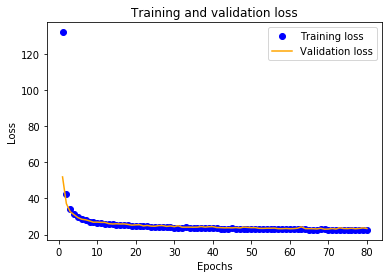

In [11]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.savefig('/home/jieun201/fullprecision400e_yprofile/loss.png')

In [12]:
p_test = model.predict(X_test)

In [13]:
residuals = np.subtract(p_test,y_test)

In [14]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [15]:
len(residuals)

500000

(0, 40677.0)

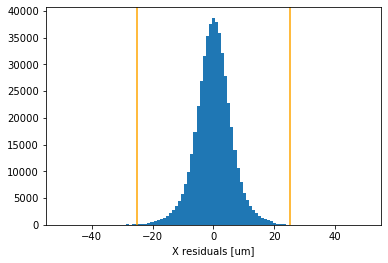

In [16]:
# X coordinate
x = np.linspace(-50,50,100)

plt.hist(residuals[:,0],bins=x)
ymax = plt.ylim()[1]
plt.plot([25,25],[0,ymax],color='orange')
plt.plot([-25,-25],[0,ymax],color='orange')
plt.xlabel('X residuals [um]')
plt.ylim(0,ymax)


(0, 50772.75)

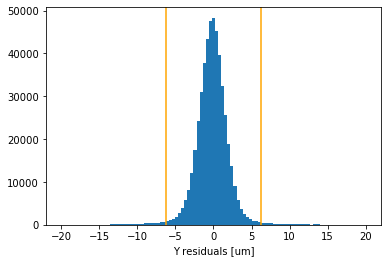

In [17]:
# Y coordinate
plt.hist(residuals[:,1],bins=np.linspace(-20,20,100))
ymax = plt.ylim()[1]
plt.plot([12.5/2,12.5/2],[0,ymax],color='orange')
plt.plot([-12.5/2,-12.5/2],[0,ymax],color='orange')
plt.xlabel('Y residuals [um]')
plt.ylim(0,ymax)